In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style = 'seaborn')
%matplotlib inline

<ipython-input-5-075b5242b61d>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


In [ ]:
df_reviews_preprocessed = pd.read_csv('/content/gdrive/MyDrive/Text Mining/Progetto_Brambatti_Fracchia_Privitera/Data/df_reviews_preprocessed.csv')


One hot encoding of label

In [ ]:
df_reviews_preprocessed['label'] = np.where(df_reviews_preprocessed['label']=='positive',1,0)
df_reviews_preprocessed.head(10)

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language
0,0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,0,en
1,2,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,0,en
2,3,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,0,en
3,4,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,0,en
4,5,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,0,en
5,6,4c445b4b34fc8f4ada2ddcd819a05b58,368449,5c7fbb4bcde0a004abe524c4c03d209d,1,not great reads like th grader really well con...,0,en
6,7,6096427ce218e7965671ef46f8fbaa31,10448215,e60d2669f94ca9977a5777ab96cc694c,1,book appeal fans dan brown plot relies main ch...,0,en
7,8,b7d8a8a36da8cbf54aa0dbad66f37dfe,78129,5b88e73a69479f43eb02c432aacc5e54,1,several people know read loved series thought ...,0,en
8,9,7cbe23bcf53f42276f237316ba79b6d7,12257650,7a0abc268fdaec9cebff7811bb13e4e4,1,read one gave made think comic book maybe year...,0,en
9,10,22496af88f94ec2203ce5656ee2852f0,27868408,0af66bd97cfc1f7231f2cb2f8c6b9256,1,book soo slow end not justify means know got g...,0,en


1    95706
0    49945
Name: label, dtype: int64


<Axes: ylabel='label'>

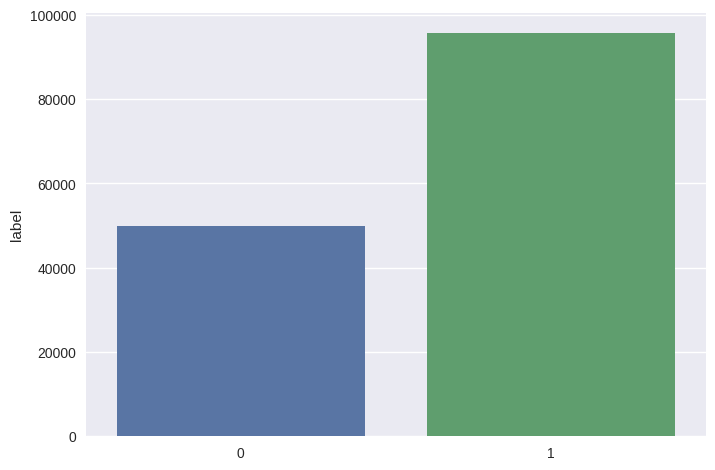

In [ ]:
#balanced dataset? --> positve are double of negative!
import seaborn as sns
x=df_reviews_preprocessed['label'].value_counts()
print(x)

sns.barplot(x=x.index, y=x)

In [ ]:
from sklearn.utils import resample

# Splitting dataset in two according to class label
df_positive = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 1]
df_negative = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 0]

# Undersampling on positive class
df_positive_downsampled = resample(df_positive, replace=False, n_samples=len(df_negative), random_state=42)

# re building the dataframe
df_reviews_preprocessed = pd.concat([df_negative, df_positive_downsampled])

In [ ]:
# WORD-COUNT on average
df_reviews_preprocessed['word_count'] = df_reviews_preprocessed['review_text'].apply(lambda x: len(str(x).split()))
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count'].mean()) #Positive reviews
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count'].mean()) #Negative reviews

57.464270697767546
51.89870857943738


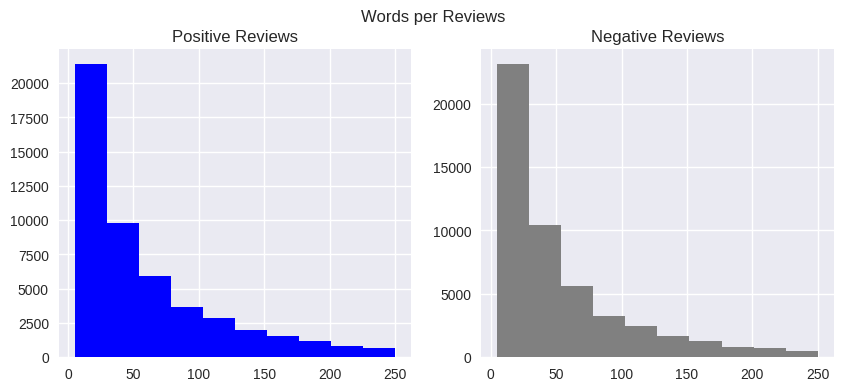

In [ ]:
# PLOTTING WORD-COUNT
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Positive Reviews')
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count']
ax2.hist(train_words,color='gray')
ax2.set_title('Negative Reviews')
fig.suptitle('Words per Reviews')
plt.show()

In [ ]:
df_reviews_preprocessed= df_reviews_preprocessed[df_reviews_preprocessed['word_count']<=250]
df_reviews_preprocessed.shape

(99890, 9)

Shuffling the dataset

In [ ]:
df_reviews_preprocessed = df_reviews_preprocessed.sample(frac=1, random_state=42)
df_reviews_preprocessed.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language,word_count
85060,96318,e68c221b98d5561680dd6838f059b55f,10164090,87b673e376725cd52b717347b5e62ad6,4,one better mysteries series dandy goes underco...,1,en,34
80785,91444,18a596fca5538cb7ec4a2fee4a1cb04d,15797938,24413289d697b76a3c856a8fd765a162,4,expecting less backstory dinner conversation b...,1,en,22
90544,102557,59b3841daa2178e65769d03edda26554,17978427,49ed3922904a870b13f8d51909eb6463,4,harry hole flawed brilliant little disappointi...,1,en,25
19919,22592,af0a16eb98410578b1f90a21a5ec828c,21745,d5df02f07c041d4ee65f908ab5531ba2,3,fun read already hooked series otherwise would...,0,en,8
144585,164781,3b66a9e0b28a6392a3fa824aa0d94d34,22732825,5b9c8e506e82a8e65928b55b3fe82285,5,recompense second installment basil ackroyd fr...,1,en,127


In [ ]:
df_reviews_preprocessed.reset_index(inplace=True)
df_reviews_preprocessed.head()

,index,Unnamed: 0,user_id,book_id,review_id,rating,review_text,label,language,word_count
0,85060,96318,e68c221b98d5561680dd6838f059b55f,10164090,87b673e376725cd52b717347b5e62ad6,4,one better mysteries series dandy goes underco...,1,en,34
1,80785,91444,18a596fca5538cb7ec4a2fee4a1cb04d,15797938,24413289d697b76a3c856a8fd765a162,4,expecting less backstory dinner conversation b...,1,en,22
2,90544,102557,59b3841daa2178e65769d03edda26554,17978427,49ed3922904a870b13f8d51909eb6463,4,harry hole flawed brilliant little disappointi...,1,en,25
3,19919,22592,af0a16eb98410578b1f90a21a5ec828c,21745,d5df02f07c041d4ee65f908ab5531ba2,3,fun read already hooked series otherwise would...,0,en,8
4,144585,164781,3b66a9e0b28a6392a3fa824aa0d94d34,22732825,5b9c8e506e82a8e65928b55b3fe82285,5,recompense second installment basil ackroyd fr...,1,en,127


In [ ]:
df_reviews_preprocessed.drop(columns=['index' , 'Unnamed: 0'],inplace=True) #'Unnamed: 0'
df_reviews_preprocessed.tail()

,user_id,book_id,review_id,rating,review_text,label,language,word_count
99885,6d331c858c1e7688572df30b2dcee0ee,8491980,21bb7b67686f99bb83f6c4c81f258efb,2,rarely read true crime novels reminded althoug...,0,en,54
99886,0a4cee787e44914c038aa6c1a27a0260,22206617,3bbc8c903a38bb3647edd5c493f0d0e8,4,great read another tess monaghan series first ...,1,en,61
99887,c791ede441204ff82b792efb99697922,23482795,fe6abee61381b49bddd6b1c03f3f91dd,5,loved book never read karin slaughter thought ...,1,en,49
99888,4b1948b45023a002fa67e28a378f06bd,17212231,bbedbc85d7ff65bb092156e792b20a78,1,okay classify one worst dan brown far managed ...,0,en,13
99889,83d71654cbd761bb197c33a1c58c3803,17348167,45122f9020dc423fb8975d4740d2ad46,3,fourth novel alexander seaton hero first intro...,0,en,115


Max length per sentence

In [ ]:
max_sentence = max(df_reviews_preprocessed['review_text'], key=len)
words_per_sentence = len(max_sentence.split())
print(f"The max length of a review is {words_per_sentence}")

The max length of a review is 249


# GloVe embedding
Unsupervised learning algo to represent word as dense vector by keeping into account also context. GloVe is a pre trained word vectors model.

Basically uses frequencies of co-occurences rather than related word to context. More information of words. Combinaton of word vector related to probability of co-occurence in that specific corpus.



In [ ]:
# create the function to obtain the corpus
# that is applied to the following chunk

from nltk.tokenize import word_tokenize
import nltk


def create_corpus_tk(df):
    corpus = []
    for text in df['review_text']:
        words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus


In [ ]:
# let's apply the function to our text
import nltk
nltk.download('punkt')

corpus = create_corpus_tk(df_reviews_preprocessed)
#corpus= create_corpus_tk(X_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# how many words have we in our corpus?
num_words= len(corpus)
print(num_words)

99890


In [ ]:
corpus[0]

['one',
 'better',
 'mysteries',
 'series',
 'dandy',
 'goes',
 'undercover',
 'lady',
 'maid',
 'mrs',
 'b',
 'alfour',
 'hires',
 'help',
 'escape',
 'husband',
 'threatened',
 'kill',
 'turns',
 'murdered',
 'within',
 'days',
 'dandy',
 'arrival',
 'strike',
 'newspapers',
 'trains',
 'transportation',
 'coalminers',
 'add',
 'mix',
 'dandy',
 'hands',
 'full']

In [ ]:
#splitting in train e test
# test set is 20% of the entrire set
from sklearn.model_selection import train_test_split
X, y = df_reviews_preprocessed['review_text'], df_reviews_preprocessed['label']
X_train, X_test, y_train, y_test = train_test_split(df_reviews_preprocessed['review_text'],
                                                    df_reviews_preprocessed['label'],
                                                    test_size=0.2, random_state = 45)

In [ ]:
# train sententces
X_train

65599    painful finish triolgy characters deep paper w...
59892    rating stars first book read author book start...
91031    interesting mystery fascinating characters wel...
55437    first things first need say massive thank mich...
62810     stars provided arc via netgalley exchange hon...
                               ...                        
12895    listened audible version book gave overall rat...
60960    first robin cook book cook known medical thril...
6012     run books disappointed almost know want read o...
63107    book another hard one huge example not read se...
6558     amazing stone barrington find much time casual...
Name: review_text, Length: 79912, dtype: object

In [ ]:
# train labels
y_train

65599    0
59892    1
91031    1
55437    0
62810    0
        ..
12895    1
60960    0
6012     0
63107    0
6558     0
Name: label, Length: 79912, dtype: int64

In [ ]:
# let's tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 249

In [ ]:
#let's tokenize using actual words of our vocabulary
# and apply it to our train sentences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
# sequences created on sentences
# converted all words to corresponding integer in tokenizer
train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences

[[2405,
  246,
  46515,
  7,
  616,
  1890,
  57,
  787,
  57,
  1109,
  1754,
  567,
  31,
  15972,
  183,
  29,
  6138,
  7104,
  56,
  7104,
  56,
  1558,
  18,
  1189,
  36959],
 [428,
  65,
  11,
  1,
  2,
  23,
  1,
  317,
  1900,
  3254,
  45,
  5270,
  483,
  139,
  3064,
  128,
  622,
  811,
  1900,
  4352,
  148,
  1153,
  400,
  20597,
  1427,
  1076,
  104,
  1900,
  3254,
  131,
  5270,
  1137,
  10092,
  1763,
  4943,
  1900,
  889,
  63,
  400,
  535,
  55,
  783,
  589,
  1153,
  6,
  4066,
  5463,
  632,
  117,
  1900,
  242,
  46,
  1153,
  33,
  153,
  400,
  693,
  1900,
  4839,
  1197,
  898,
  255,
  382,
  3,
  145,
  864,
  3254,
  685,
  1,
  168,
  39,
  221,
  12,
  54,
  16,
  267,
  1900,
  20,
  326,
  6,
  949,
  42,
  382,
  400,
  163,
  103,
  26,
  1,
  27,
  107,
  335,
  352,
  153,
  45,
  260,
  12,
  113,
  127,
  221,
  824,
  77,
  560,
  371,
  5909,
  23,
  7549,
  19387,
  206,
  394,
  208,
  64,
  41,
  1348,
  173,
  3369],
 [35, 13, 508,

In [ ]:
# to use keras we need pad of fixed length: each sentence will be in this length
# we use the max length of out reviews, nothing will be truncated
train_padded = pad_sequences (
    train_sequences, maxlen=max_len, truncating='post', padding='post'
)

In [ ]:
# 0 means that the review is shorter than 249 words
train_padded

array([[ 2405,   246, 46515, ...,     0,     0,     0],
       [  428,    65,    11, ...,     0,     0,     0],
       [   35,    13,   508, ...,     0,     0,     0],
       ...,
       [  427,    14,   277, ...,     0,     0,     0],
       [    1,    50,   109, ...,     0,     0,     0],
       [  307,  1062,  5548, ...,     0,     0,     0]], dtype=int32)

In [ ]:
# let's replicate it on our test sentences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences (
    test_sequences, maxlen=max_len, truncating='post', padding='post'
)

In [ ]:
test_padded # same length of 249

array([[  35,   28,   39, ...,    0,    0,    0],
       [   1,  221,    2, ...,    0,    0,    0],
       [ 307,    1,  669, ...,    0,    0,    0],
       ...,
       [ 136,    4, 1498, ...,    0,    0,    0],
       [  79, 4425,  163, ...,    0,    0,    0],
       [  36,    5,   22, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print(X_train[0]) #real review
print(train_sequences[0]) #padded review

one better mysteries series dandy goes undercover lady maid mrs b alfour hires help escape husband threatened kill turns murdered within days dandy arrival strike newspapers trains transportation coalminers add mix dandy hands full
[2405, 246, 46515, 7, 616, 1890, 57, 787, 57, 1109, 1754, 567, 31, 15972, 183, 29, 6138, 7104, 56, 7104, 56, 1558, 18, 1189, 36959]


In [ ]:
word_index = tokenizer.word_index
print("Number of unique words:",len(word_index))

Number of unique words: 76997


In [ ]:
# dictionary: keys are words found, value are increment numbers
word_index


{'book': 1,
 'read': 2,
 'not': 3,
 'story': 4,
 'one': 5,
 'like': 6,
 'characters': 7,
 'really': 8,
 'series': 9,
 'good': 10,
 'first': 11,
 'would': 12,
 'mystery': 13,
 'books': 14,
 'well': 15,
 'much': 16,
 'reading': 17,
 'time': 18,
 'get': 19,
 'character': 20,
 'novel': 21,
 'love': 22,
 'author': 23,
 'way': 24,
 'end': 25,
 'great': 26,
 'plot': 27,
 'little': 28,
 'no': 29,
 'also': 30,
 'even': 31,
 'think': 32,
 'know': 33,
 'could': 34,
 'interesting': 35,
 'enjoyed': 36,
 'found': 37,
 'life': 38,
 'bit': 39,
 'still': 40,
 'two': 41,
 'find': 42,
 'see': 43,
 'many': 44,
 'going': 45,
 'people': 46,
 'writing': 47,
 'though': 48,
 'back': 49,
 'another': 50,
 'murder': 51,
 'ending': 52,
 'new': 53,
 'liked': 54,
 'things': 55,
 'next': 56,
 'written': 57,
 'never': 58,
 'lot': 59,
 'loved': 60,
 'felt': 61,
 'thought': 62,
 'something': 63,
 'review': 64,
 'stars': 65,
 'want': 66,
 'made': 67,
 'make': 68,
 'main': 69,
 'say': 70,
 'better': 71,
 'go': 72,
 'quite

In [ ]:
word_index['mystery'] #mystery has index 13

13

## Creating Embedding dictionary using GloVe

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip


--2024-01-03 14:21:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-01-03 14:21:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-03 14:21:39--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dict = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='UTF-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vectors = np.asarray(values[1:], 'float32')
      embedding_dict[word] = vectors

f.close()


In [ ]:
#embedding dictionary that adds each vector in the index GloVe pre trained vector
#each word is mapped to a specific vector of 100 dimensions, because we are using this version of GloVe
# the specific word is written between ''
embedding_dict

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
# let's create embedded matrix
num_words = len(word_index) +1 #because for loop
embedding_matrix = np.zeros((num_words, 100)) #embedding matrix--> array of zeros

for word, i in word_index.items():
  if i<num_words:
    emb_vec = embedding_dict.get(word) # assing the vector to the actual word in our corpus
    if emb_vec is not None:
      embedding_matrix[i]=emb_vec


In [ ]:
#array of vector, or better: array of the embedded vectors
# position is the specific position of the word in our word_index
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.19744   ,  0.44830999,  0.13688999, ..., -0.56967998,
         0.0015374 ,  0.66600001],
       [-0.36109   ,  0.39901999, -0.1354    , ..., -0.47103   ,
        -0.24160001,  0.70213002],
       ...,
       [ 0.27358001, -0.042773  , -0.34406   , ...,  0.33405   ,
        -0.62037998,  0.36640999],
       [-0.57129002, -0.47850001,  0.36961001, ..., -0.26666   ,
        -0.74638999,  0.13352001],
       [ 0.66338998,  0.61650002,  0.072615  , ...,  0.15455   ,
        -0.86277997,  0.2859    ]])

In [ ]:
# let's check for mystery word
word_index['mystery'] # 13th word

13

In [ ]:
embedding_dict.get('mystery') #correspondant embedded vector

array([ 0.14834  ,  0.099263 ,  0.86884  ,  0.10688  , -0.028054 ,
        0.51813  ,  0.69944  , -1.2203   ,  0.67156  , -0.27901  ,
       -0.14781  ,  0.88422  ,  0.1765   ,  0.28134  , -0.72071  ,
        0.27847  ,  0.57687  ,  0.56353  ,  0.035832 ,  0.44953  ,
        0.29801  , -0.49046  , -0.46221  , -1.1598   ,  1.1995   ,
        0.38519  ,  0.64766  , -0.065422 , -0.8448   , -0.11516  ,
       -0.59156  , -0.79959  , -0.46094  , -0.21508  , -0.49586  ,
        0.27561  ,  0.061092 , -0.12521  ,  0.82057  , -0.22024  ,
       -0.3982   ,  0.36853  , -0.26102  , -0.45969  ,  0.42837  ,
        0.22726  ,  0.097601 , -0.046221 ,  0.48718  ,  0.48994  ,
        0.43573  , -0.21736  ,  0.53466  ,  0.94252  , -0.16132  ,
       -2.2001   , -0.25975  ,  0.36754  ,  0.25449  ,  0.6196   ,
       -0.086495 ,  1.4928   ,  0.065041 , -0.65808  ,  1.0169   ,
       -0.33186  ,  0.11418  ,  0.25242  ,  0.04064  ,  0.42889  ,
       -0.20741  ,  0.013702 , -0.084233 ,  1.0767   , -0.0867

In [ ]:
# let's verify that embedded matrix in position 13 is the embedded vector of mystery
(embedding_matrix[13] == embedding_dict.get('mystery')).all()

# ok it is verified the correspondance

True

Embedding matrix: array in which to specific position correspond to the word in the word_index


In [ ]:
print(train_padded.shape) #items in train set, vectors of length of 249
print(y_train.shape)

print(test_padded.shape) # items in test set
print(y_test.shape)

(79912, 249)
(79912,)
(19978, 249)
(19978,)


In [ ]:
print(type(X_train))

<class 'pandas.core.series.Series'>


A **hybrid model** using GloVe with an LSTM layer and a convolutional layer in Keras

**Embedding Layer:**

- Input layer for representing words in a continuous vector space.

- Embedding dimension of 100.

- Initialized with a constant embedding matrix.

- Input sequence length set to max_len.

- Non-trainable as embeddings are pre-trained.

**LSTM Layer:**

- Long Short-Term Memory (LSTM) layer with 128 units.
- Dropout of 0.2 and recurrent dropout of 0.2 to prevent overfitting.
- Returns sequences for subsequent layers.

**Convolutional Layer:**

- Convolutional layer with 128 filters and a kernel size of 5.
Applies the Rectified Linear Unit (ReLU) activation function.

**Global Max Pooling Layer:**

- Reduces dimensionality by taking the maximum value across the sequence.

**Fully Connected Layers:**

- Dense layer with 64 units and ReLU activation function.
- Output Dense layer with 1 unit and Sigmoid activation for binary classification.

**Model Compilation:**

- Compiles the model using binary crossentropy loss and the Adam optimizer.

**Training:**

- Trains the model on the provided data for 5 epochs.

- Uses binary crossentropy as the loss function and Adam optimizer.

Epoch 1/10
2498/2498 [==============================] - 1898s 758ms/step - loss: 0.5543 - accuracy: 0.7100 - val_loss: 0.5031 - val_accuracy: 0.7495
Epoch 2/10
2498/2498 [==============================] - 1846s 739ms/step - loss: 0.4947 - accuracy: 0.7528 - val_loss: 0.4824 - val_accuracy: 0.7614
Epoch 3/10
2498/2498 [==============================] - 1851s 741ms/step - loss: 0.4681 - accuracy: 0.7691 - val_loss: 0.4766 - val_accuracy: 0.7622
Epoch 4/10
2498/2498 [==============================] - 1870s 749ms/step - loss: 0.4461 - accuracy: 0.7847 - val_loss: 0.4676 - val_accuracy: 0.7711
Epoch 5/10
2498/2498 [==============================] - 1868s 748ms/step - loss: 0.4274 - accuracy: 0.7952 - val_loss: 0.4715 - val_accuracy: 0.7707
Epoch 6/10
2498/2498 [==============================] - 1873s 750ms/step - loss: 0.4087 - accuracy: 0.8072 - val_loss: 0.4730 - val_accuracy: 0.7710
Epoch 7/10
2498/2498 [==============================] - 1871s 749ms/step - loss: 0.3922 - accuracy: 0.8153

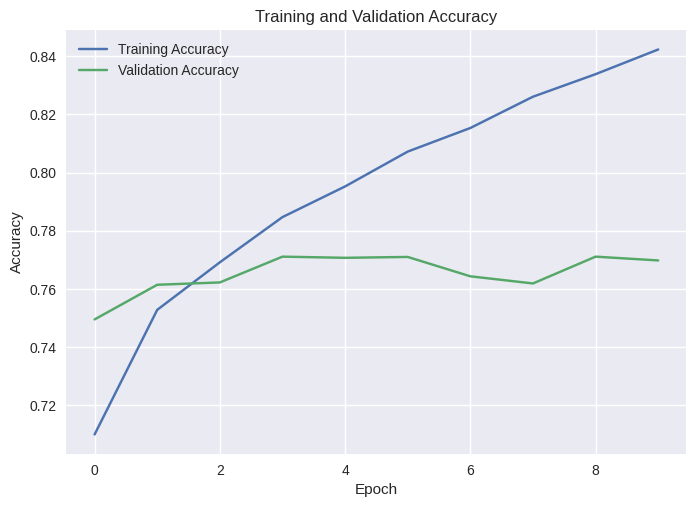

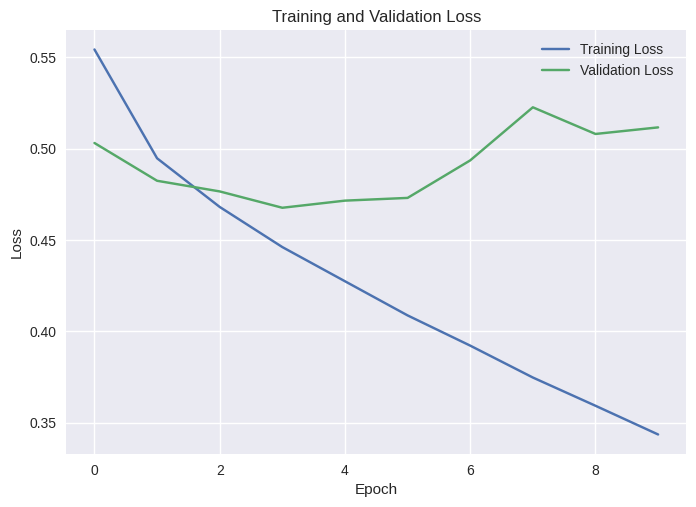

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense
from keras.initializers import Constant

# Creating the model
model = Sequential()


model.add(
    Embedding(
        num_words, #our corpus
        100,
        embeddings_initializer=Constant(embedding_matrix), #initialized with our matrix
        input_length = max_len,
        trainable = False, #because already trained
    )
)

# Adding LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Addition of the convolutional layer
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())


model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_padded,
    y_train,
    epochs=10,
    validation_data=(test_padded, y_test),
    verbose=1
)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Looking at the graph above, we notice that the model overfits. In order to reduce this effect we re-iterate the model by reducing the number of epochs from 10 to 4.

**Model Ibrid 1_ less epochs**

Epoch 1/4
2498/2498 [==============================] - 1983s 792ms/step - loss: 0.5591 - accuracy: 0.7056 - val_loss: 0.5105 - val_accuracy: 0.7430
Epoch 2/4
2498/2498 [==============================] - 1895s 758ms/step - loss: 0.4932 - accuracy: 0.7545 - val_loss: 0.4805 - val_accuracy: 0.7626
Epoch 3/4
2498/2498 [==============================] - 1944s 778ms/step - loss: 0.4669 - accuracy: 0.7727 - val_loss: 0.4929 - val_accuracy: 0.7572
Epoch 4/4
2498/2498 [==============================] - 1911s 765ms/step - loss: 0.4450 - accuracy: 0.7843 - val_loss: 0.4699 - val_accuracy: 0.7715


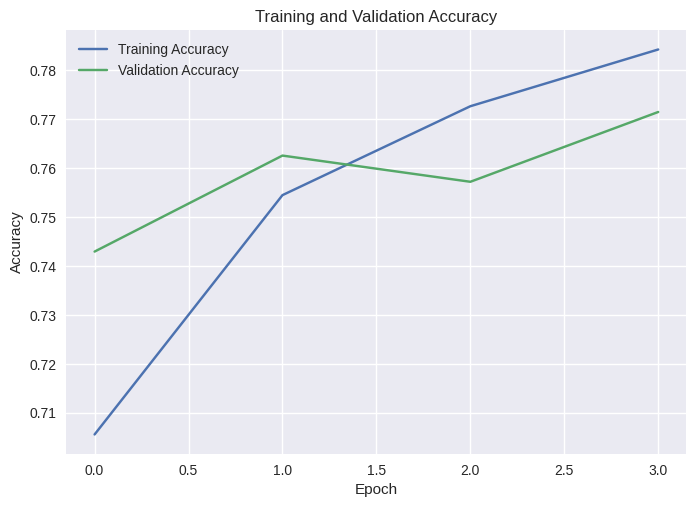

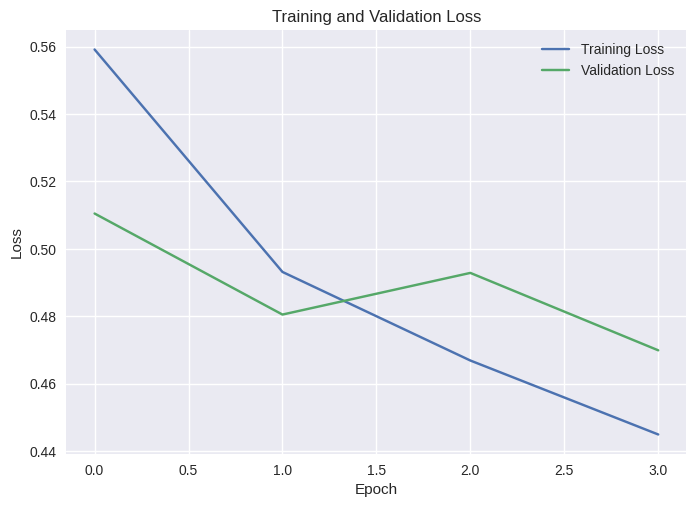

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense
from keras.initializers import Constant


model1 = Sequential()


model1.add(
    Embedding(
        num_words, #our corpus
        100,
        embeddings_initializer=Constant(embedding_matrix),
        input_length = max_len,
        trainable = False,
    )
)

# Adding LSTM layer
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Adding convolutional layer
model1.add(Conv1D(128, 5, activation='relu'))
model1.add(GlobalMaxPooling1D())


model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Compiling model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model1.fit(
    train_padded,
    y_train,
    epochs=4,
    validation_data=(test_padded, y_test),
    verbose=1
)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Hybrid Model 2**

In [ ]:
'''
from keras.models import Sequentialopl
from keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense

# Creating model
model1 = Sequential()

model1.add(
    Embedding(
        num_words,
        100,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_len,
        trainable=False,
    )
)

# An LSTM layer with dropout
model1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# A convolutional layer with max pooling
model1.add(Conv1D(64, 3, activation='relu'))
model1.add(GlobalMaxPooling1D())

# A fully connected layer for the output
model1.add(Dense(32, activation='relu'))

# Output layer
model1.add(Dense(1, activation='sigmoid'))

# Compiling model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model1.fit(
    train_padded,
    y_train,
    epochs=10,
    validation_data=(test_padded, y_test),
    verbose=1
)

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

"\nfrom keras.models import Sequentialopl\nfrom keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dense\n\n# Creazione del modello\nmodel1 = Sequential()\n\nmodel1.add(\n    Embedding(\n        num_words,\n        100,\n        embeddings_initializer=Constant(embedding_matrix),\n        input_length=max_len,\n        trainable=False,\n    )\n)\n\n# Uno strato LSTM con dropout\nmodel1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))\n\n# Uno strato convoluzionale con max pooling\nmodel1.add(Conv1D(64, 3, activation='relu'))\nmodel1.add(GlobalMaxPooling1D())\n\n# Uno strato fully connected per l'output\nmodel1.add(Dense(32, activation='relu'))\n\n# Strato di output\nmodel1.add(Dense(1, activation='sigmoid'))\n\n# Compilazione del modello\nmodel1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n\nhistory = model1.fit(\n    train_padded,\n    y_train,\n    epochs=10,\n    validation_data=(test_padded, y_test),\n    verbose=1\n)\n\n# Grafico per l

In [ ]:
# predict actual data
#sequences = tokenizer.texts_to_sequences(X_test)
#padded= pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
#predicting on the padded and transfrom to integer
#pred= model.predict(padded)
#pred_int_ibrido1 =pred.round().astype('int')

In [ ]:
#predicting on the padded and transfrom to integer
#pred= model1.predict(padded)
#pred_int_ibrido2 =pred.round().astype('int')

In [ ]:
#let's build the dataset with actual and predicted label
#data = {'review_text': list(X_test), 'actual_label': list(y_test), 'predicted_label_ibrido1': list(pred_int_ibrido1)}#, 'predicted_label_ibrido2': list(pred_int_ibrido2) }

# Creare un DataFrame
#df_results = pd.DataFrame(data)

In [ ]:
#remove square brakets from predicted column
#df_results['predicted_label_ibrido1'] = df_results['predicted_label_ibrido1'].astype(str)
#df_results['predicted_label_ibrido1'] = df_results['predicted_label_ibrido1'].str.strip("[]").astype(int)
#remove square brakets from predicted column
#df_results['predicted_label_ibrido2'] = df_results['predicted_label_ibrido2'].astype(str)
#df_results['predicted_label_ibrido2'] = df_results['predicted_label_ibrido2'].str.strip("[]").astype(int)

In [ ]:
# calculating the correct predictions of the first model
#df_results['correct_prediction_ibrido1'] = df_results['actual_label']-df_results['predicted_label_ibrido1']
# calculating the correct predictions of the second model
#df_results['correct_prediction_ibrido2'] = df_results['actual_label']-df_results['predicted_label_ibrido2']

In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
#df_results['correct_prediction_ibrido1'] = df_results['correct_prediction_ibrido1'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
#df_results['correct_prediction_ibrido2'] = df_results['correct_prediction_ibrido2'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})


In [ ]:
#df_results.groupby('correct_prediction_ibrido1')['predicted_label_ibrido1'].count()

In [ ]:
#df_results.groupby('correct_prediction_ibrido2')['predicted_label_ibrido2'].count()

In [ ]:
'''
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_ibrido1)
# Etichette delle classi
class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
'''

'\n#Confusion Matrix\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\nimport numpy as np\n\nc_m=confusion_matrix(y_test, pred_int_ibrido1)\n# Etichette delle classi\nclass_labels = [\'Negative Review\', \'Positive Review\']\n\nplt.figure(figsize=(8, 6))\nsns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)\n\nplt.title(\'Confusion Matrix\')\nplt.xlabel(\'Predicted Label\')\nplt.ylabel(\'Actual Label\')\nplt.show()\n'

In [ ]:
'''
c_m=confusion_matrix(y_test, pred_int_ibrido2)
# Etichette delle classi
class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
'''

'\nc_m=confusion_matrix(y_test, pred_int_ibrido2)\n# Etichette delle classi\nclass_labels = [\'Negative Review\', \'Positive Review\']\n\nplt.figure(figsize=(8, 6))\nsns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)\n\nplt.title(\'Confusion Matrix\')\nplt.xlabel(\'Predicted Label\')\nplt.ylabel(\'Actual Label\')\nplt.show()\n'

In [ ]:
#from sklearn.metrics import classification_report

In [ ]:
#print(classification_report(y_test, pred_int_ibrido1))

In [ ]:
#print(classification_report(y_test, pred_int_ibrido2))

# Model 3:

###  TM Layer Configuration:

**New Model:**

- Two LSTM layers with 128 units each.

- The first LSTM layer has a dropout of 0.1, returns sequences, and uses L2 regularization with a penalty of 0.01.

- The second LSTM layer has a dropout of 0.1 and uses L2 regularization with a penalty of 0.01.

**Previous Model (1 and 2):**

- LSTM layers with varying units (100,128).


### Dropout Layer:

**New Model:**

- Includes a Dropout layer with a dropout rate of 0.5 after the first LSTM layer.

**Previous Model:**

No explicit Dropout layer in the original model.

### Learning Rate of the Optimizer:

**New Model:**

- Uses Adam optimizer with a learning rate of 1e-4.

**Previous Model:**

- Uses Adam optimizer with a learning rate of 0.001.




Epoch 1/50
2498/2498 [==============================] - 69s 25ms/step - loss: 1.1395 - accuracy: 0.5007 - val_loss: 0.6934 - val_accuracy: 0.4991
Epoch 2/50
2498/2498 [==============================] - 55s 22ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4991
Epoch 3/50
2498/2498 [==============================] - 55s 22ms/step - loss: 0.6931 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.4991
Epoch 4/50
2498/2498 [==============================] - 59s 24ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.4991
Epoch 5/50
2498/2498 [==============================] - 54s 22ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 6/50
2498/2498 [==============================] - 55s 22ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5009
Epoch 7/50
2498/2498 [==============================] - 54s 22ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6932 -

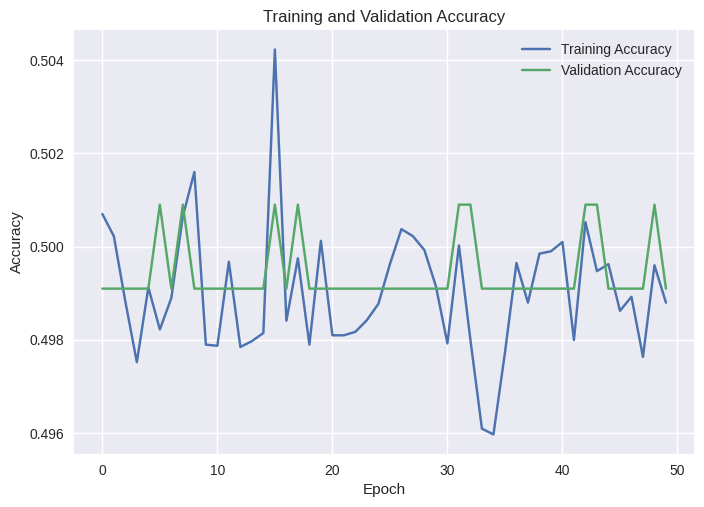

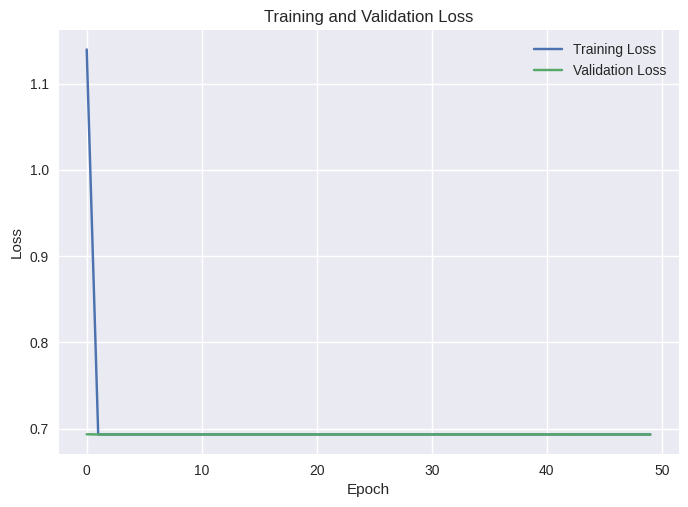

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Creating model
model2 = Sequential()

model2.add(
    Embedding(
        num_words,
        100,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_len,
        trainable=False,
    )
)
model2.add(LSTM(128, dropout=0.1, return_sequences=True, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.5))
model2.add(LSTM(128, dropout=0.1, kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compiling model with reduced learning rate
optimizer = Adam(learning_rate=1e-4)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model2.fit(
    train_padded,
    y_train,
    epochs=50, # until 20 epochs the model does not learn, try with 50
    validation_data=(test_padded, y_test),
    verbose=1
)


# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# predict actual data
sequences = tokenizer.texts_to_sequences(X_test)
padded= pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
#predicting on the padded and transfrom to integer
pred= model1.predict(padded)
pred_int_ibrido1 =pred.round().astype('int')

625/625 [==============================] - 47s 75ms/step


In [ ]:
#predicting on the padded and transfrom to integer
pred= model2.predict(padded)
pred_int_ibrido2 =pred.round().astype('int')

625/625 [==============================] - 7s 9ms/step


In [ ]:
#let's build the dataset with actual and predicted label
data = {'review_text': list(X_test), 'actual_label': list(y_test), 'predicted_label_ibrido1': list(pred_int_ibrido1), 'predicted_label_ibrido2': list(pred_int_ibrido2) }

# Creare un DataFrame
df_results = pd.DataFrame(data)

In [ ]:
#remove square brakets from predicted column
df_results['predicted_label_ibrido1'] = df_results['predicted_label_ibrido1'].astype(str)
df_results['predicted_label_ibrido1'] = df_results['predicted_label_ibrido1'].str.strip("[]").astype(int)
#remove square brakets from predicted column
df_results['predicted_label_ibrido2'] = df_results['predicted_label_ibrido2'].astype(str)
df_results['predicted_label_ibrido2'] = df_results['predicted_label_ibrido2'].str.strip("[]").astype(int)

In [ ]:
# calculating the correct predictions of the first model
df_results['correct_prediction_ibrido1'] = df_results['actual_label']-df_results['predicted_label_ibrido1']
# calculating the correct predictions of the second model
df_results['correct_prediction_ibrido2'] = df_results['actual_label']-df_results['predicted_label_ibrido2']

In [ ]:
# replace values with string:
# 0 is correct prediction (true negative or true positve)
# 1 or -1 are incorrect predictions (false negative or false positive)
df_results['correct_prediction_ibrido1'] = df_results['correct_prediction_ibrido1'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})
df_results['correct_prediction_ibrido2'] = df_results['correct_prediction_ibrido2'].replace({0: 'corretto', 1: 'incorretto', -1:'incorretto'})


In [ ]:
df_results.groupby('correct_prediction_ibrido1')['predicted_label_ibrido1'].count()

correct_prediction_ibrido1
corretto      15413
incorretto     4565
Name: predicted_label_ibrido1, dtype: int64

In [ ]:
df_results.groupby('correct_prediction_ibrido2')['predicted_label_ibrido2'].count()

correct_prediction_ibrido2
corretto       9971
incorretto    10007
Name: predicted_label_ibrido2, dtype: int64

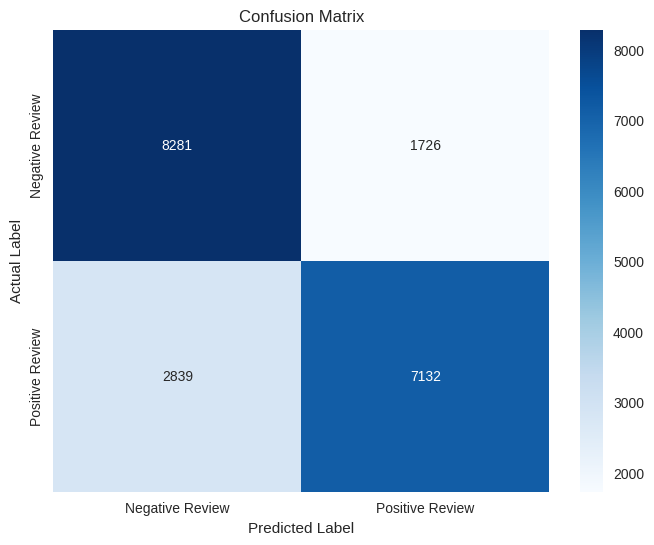

In [ ]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

c_m=confusion_matrix(y_test, pred_int_ibrido1)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

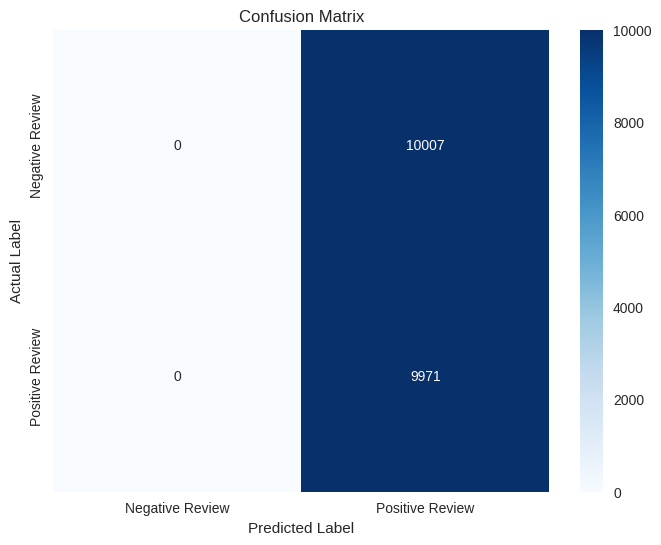

In [ ]:
c_m=confusion_matrix(y_test, pred_int_ibrido2)

class_labels = ['Negative Review', 'Positive Review']

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred_int_ibrido1))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78     10007
           1       0.81      0.72      0.76      9971

    accuracy                           0.77     19978
   macro avg       0.77      0.77      0.77     19978
weighted avg       0.77      0.77      0.77     19978



In [ ]:
print(classification_report(y_test, pred_int_ibrido2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10007
           1       0.50      1.00      0.67      9971

    accuracy                           0.50     19978
   macro avg       0.25      0.50      0.33     19978
weighted avg       0.25      0.50      0.33     19978



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
